Abstract:

This study examines how things like sidewalks and tree guards affect the health of trees in cities. We want to know if these urban things help or harm trees. We're also looking at whether having different types of trees and signs asking people to care for them makes a difference. To do this, we're collecting information about how healthy the trees are and what's around them in the city. Then, we're using math to figure out if there's a connection between these things. The results will be useful for city planners because they'll show how to make cities better for trees. They'll know what to prioritize, like fixing sidewalks or adding more tree guards. It will also help them choose the right kinds of trees to plant in different areas. Plus, they'll see if putting up signs asking for help with trees actually helps. Ultimately, this research can lead to cities being greener and healthier places for everyone to live in.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup,NavigableString
import requests
import urllib.request
import re

# Load the dataset from the provided Github link
file_path = r"https://media.githubusercontent.com/media/manvithakakollu/final/manvitha/2015_Street_Tree_Census_-_Tree_Data_20240411.csv"
data = pd.read_csv(file_path)


In [2]:
data.head(5)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
data.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


In [4]:
data.shape

(683788, 45)

In [5]:
data = data.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", data.shape)

Shape of DataFrame after removing duplicates: (683788, 45)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [7]:
# Convert 'created_at' to datetime
data['created_at'] = pd.to_datetime(data['created_at'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   tree_id           683788 non-null  int64         
 1   block_id          683788 non-null  int64         
 2   created_at        683788 non-null  datetime64[ns]
 3   tree_dbh          683788 non-null  int64         
 4   stump_diam        683788 non-null  int64         
 5   curb_loc          683788 non-null  object        
 6   status            683788 non-null  object        
 7   health            652172 non-null  object        
 8   spc_latin         652169 non-null  object        
 9   spc_common        652169 non-null  object        
 10  steward           164350 non-null  object        
 11  guards            79866 non-null   object        
 12  sidewalk          652172 non-null  object        
 13  user_type         683788 non-null  object        
 14  prob

In [9]:
data.shape



(683788, 45)

In [10]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [11]:
numerical=[]
catergorical=[]
for column in data.columns:
    if data[column].nunique()>10:
        numerical.append(column)
    else:
        catergorical.append(column)

In [12]:
numerical


['tree_id',
 'block_id',
 'created_at',
 'tree_dbh',
 'stump_diam',
 'spc_latin',
 'spc_common',
 'problems',
 'address',
 'postcode',
 'zip_city',
 'community board',
 'cncldist',
 'st_assem',
 'st_senate',
 'nta',
 'nta_name',
 'boro_ct',
 'latitude',
 'longitude',
 'x_sp',
 'y_sp',
 'council district',
 'census tract',
 'bin',
 'bbl']

In [13]:
catergorical

['curb_loc',
 'status',
 'health',
 'steward',
 'guards',
 'sidewalk',
 'user_type',
 'root_stone',
 'root_grate',
 'root_other',
 'trunk_wire',
 'trnk_light',
 'trnk_other',
 'brch_light',
 'brch_shoe',
 'brch_other',
 'borocode',
 'borough',
 'state']

In [14]:
missing_values = data.isnull().sum()

# Calculate percentage of missing values
percentage_missing = (missing_values / len(data)) * 100

print("Percentage of Missing Values:\n", percentage_missing)

Percentage of Missing Values:
 tree_id              0.000000
block_id             0.000000
created_at           0.000000
tree_dbh             0.000000
stump_diam           0.000000
curb_loc             0.000000
status               0.000000
health               4.623655
spc_latin            4.624094
spc_common           4.624094
steward             75.964773
guards              88.320064
sidewalk             4.623655
user_type            0.000000
problems            66.971634
root_stone           0.000000
root_grate           0.000000
root_other           0.000000
trunk_wire           0.000000
trnk_light           0.000000
trnk_other           0.000000
brch_light           0.000000
brch_shoe            0.000000
brch_other           0.000000
address              0.000000
postcode             0.000000
zip_city             0.000000
community board      0.000000
borocode             0.000000
borough              0.000000
cncldist             0.000000
st_assem             0.000000
st_senate

In [15]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state      

In [16]:
columns_to_drop=([ 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
      'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 
       'zip_city', 'community board', 'borocode', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'])

In [17]:
data.drop(columns=columns_to_drop, inplace=True)

In [18]:
print(data.columns)

Index(['tree_id', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'address', 'postcode', 'borough'],
      dtype='object')


In [19]:
data

,tree_id,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,address,postcode,borough
0,180683,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,108-005 70 AVENUE,11375,Queens
1,200540,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,147-074 7 AVENUE,11357,Queens
2,204026,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,390 MORGAN AVENUE,11211,Brooklyn
3,204337,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,1027 GRAND STREET,11211,Brooklyn
4,189565,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,603 6 STREET,11215,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,32 MARCY AVENUE,11211,Brooklyn
683784,183795,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,67-035 SELFRIDGE STREET,11375,Queens
683785,166161,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,130 BIDWELL AVENUE,10314,Staten Island
683786,184028,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,1985 ANTHONY AVENUE,10457,Bronx


tree_id, curb_loc, status, health, spc_latin, spc_common, guards, sidewalks, address, postcode, borough

In [20]:
missing_values = data["health"].isnull().sum()

In [21]:
missing_values

31616

univarient analysis 

In [22]:
data.sidewalk.unique()

array(['NoDamage', 'Damage', nan], dtype=object)

In [23]:
mode = data['sidewalk'].mode()

print("Mode (most common category):", mode)

Mode (most common category): 0    NoDamage
Name: sidewalk, dtype: object


In [24]:
data.sidewalk.unique()

array(['NoDamage', 'Damage', nan], dtype=object)

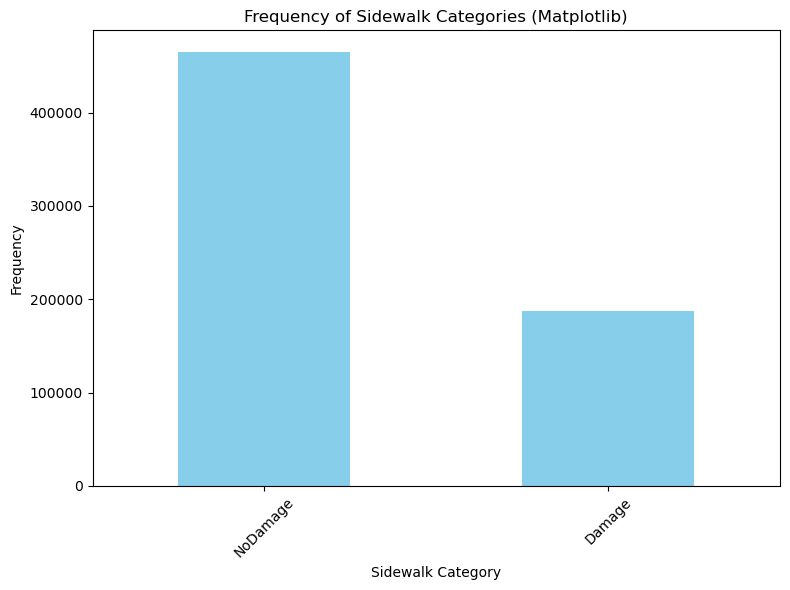

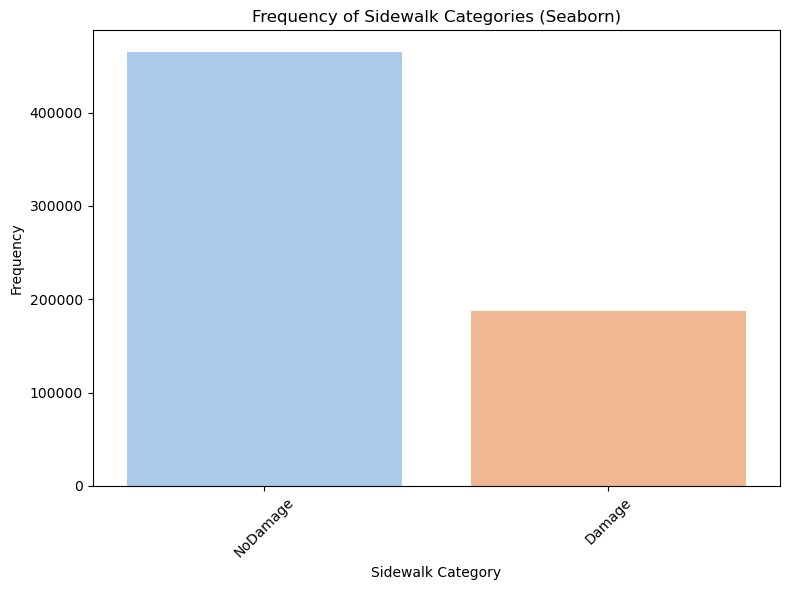

In [25]:
plt.figure(figsize=(8, 6))
data['sidewalk'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Sidewalk Categories (Matplotlib)')
plt.xlabel('Sidewalk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sidewalk', palette='pastel')
plt.title('Frequency of Sidewalk Categories (Seaborn)')
plt.xlabel('Sidewalk Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
data.health.unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [27]:
data['health'].value_counts()

health
Good    528850
Fair     96504
Poor     26818
Name: count, dtype: int64

In [28]:
data["health"].describe()

count     652172
unique         3
top         Good
freq      528850
Name: health, dtype: object

In [29]:
data.guards.unique()

array([nan, 'Helpful', 'Harmful', 'Unsure'], dtype=object)

In [30]:
guards_mode = data['guards'].mode()[0]

In [31]:
guards_mode

'Helpful'

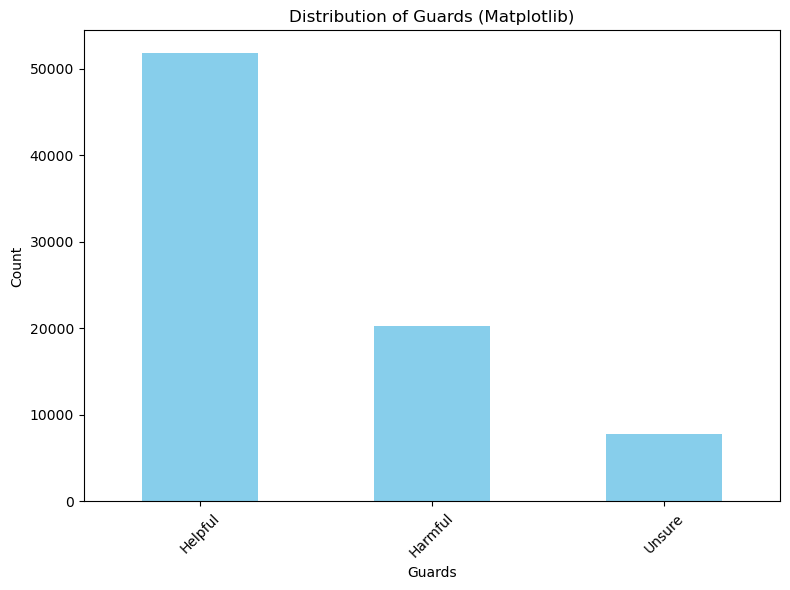

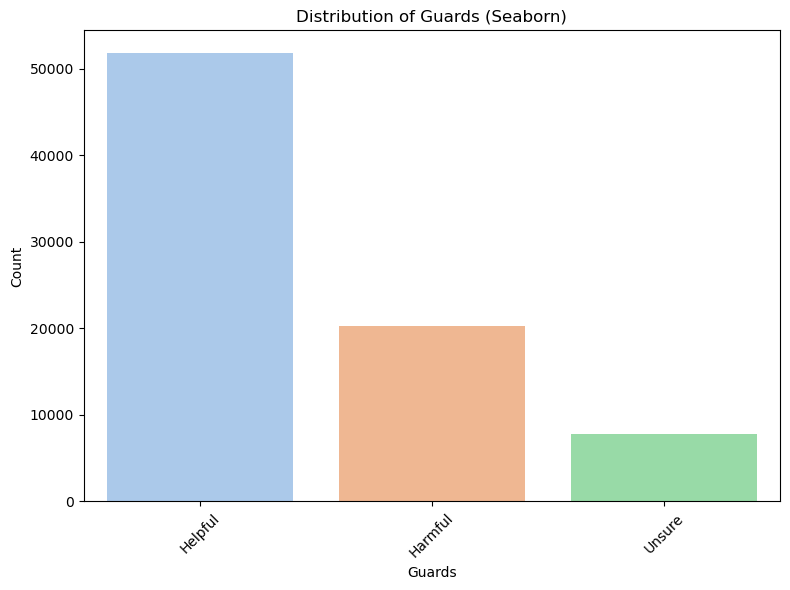

In [32]:
# Visualize with Matplotlib
plt.figure(figsize=(8, 6))
data['guards'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Guards (Matplotlib)')
plt.xlabel('Guards')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize with Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='guards', palette='pastel')
plt.title('Distribution of Guards (Seaborn)')
plt.xlabel('Guards')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
data.curb_loc.unique()

array(['OnCurb', 'OffsetFromCurb'], dtype=object)

In [34]:
most_common_value_curb_loc = data['curb_loc'].mode()[0]

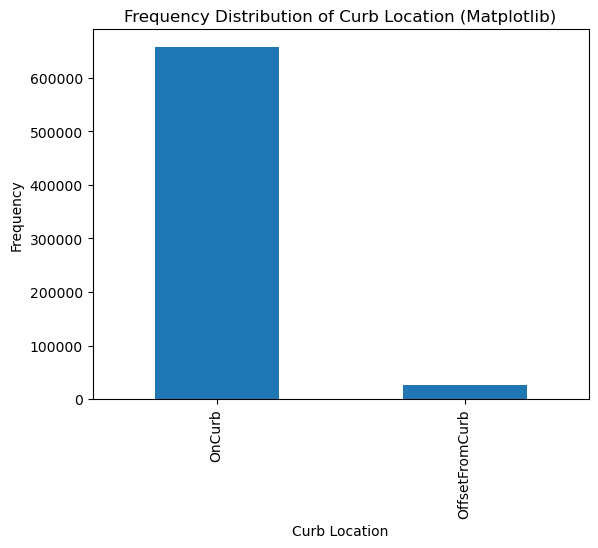

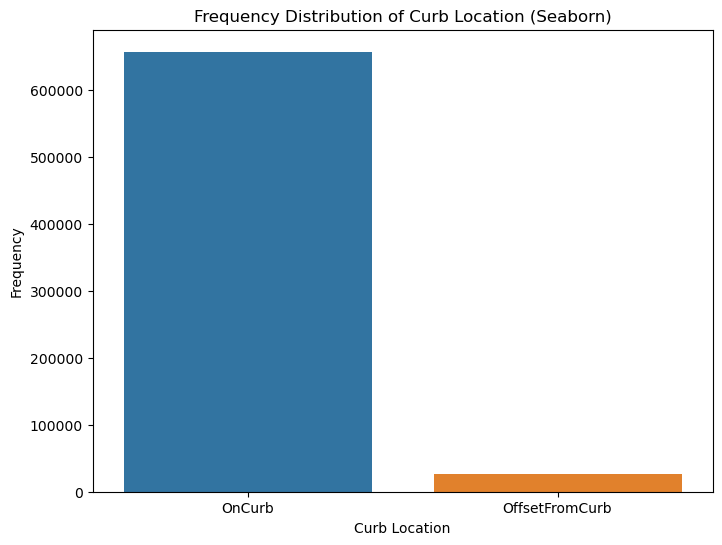

In [35]:


data['curb_loc'].value_counts().plot.bar(title="Frequency Distribution of Curb Location (Matplotlib)")
plt.xlabel('Curb Location')
plt.ylabel('Frequency')
plt.show()

# Using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='curb_loc', data=data)
plt.title("Frequency Distribution of Curb Location (Seaborn)")
plt.xlabel('Curb Location')
plt.ylabel('Frequency')
plt.show()

In [36]:
data.status.unique()

array(['Alive', 'Stump', 'Dead'], dtype=object)

In [37]:
# Count of unique values
status_count = data['status'].nunique()

# Most common value (mode)
most_common_value_in_status = data['status'].mode()[0]

In [38]:
status_count

3

In [39]:

most_common_value_in_status

'Alive'

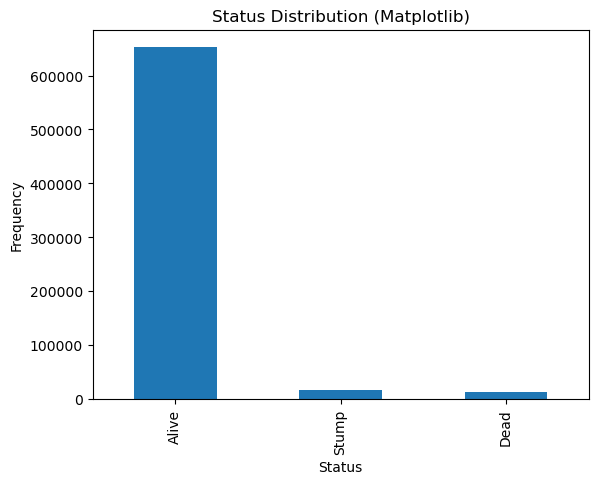

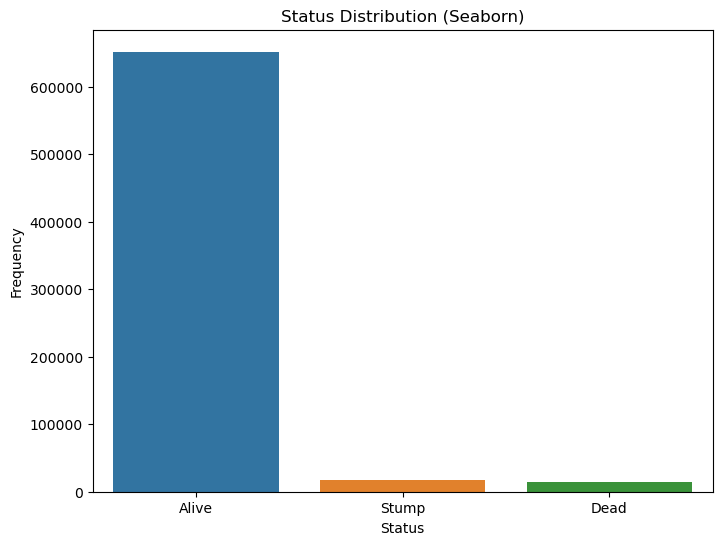

In [40]:
# Using Matplotlib
data['status'].value_counts().plot.bar(title="Status Distribution (Matplotlib)")
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

# Using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title("Status Distribution (Seaborn)")
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()




In [41]:
data.health.unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [42]:
most_common_value = data['health'].mode()[0]

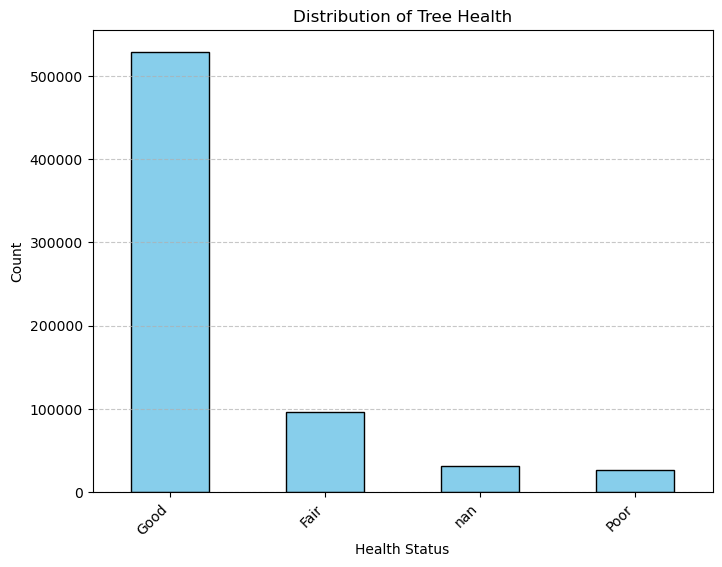

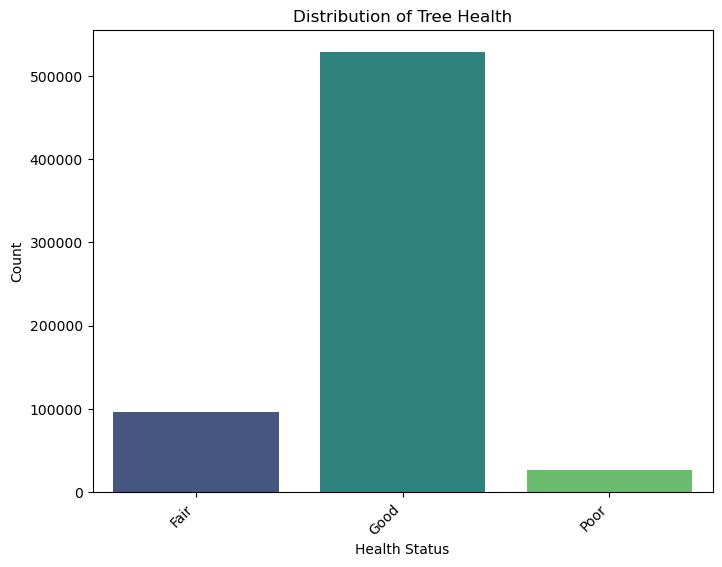

In [43]:
plt.figure(figsize=(8, 6))
data['health'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x=data['health'], palette='viridis')
plt.title('Distribution of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
data


,tree_id,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,address,postcode,borough
0,180683,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,108-005 70 AVENUE,11375,Queens
1,200540,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,147-074 7 AVENUE,11357,Queens
2,204026,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,390 MORGAN AVENUE,11211,Brooklyn
3,204337,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,1027 GRAND STREET,11211,Brooklyn
4,189565,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,603 6 STREET,11215,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,32 MARCY AVENUE,11211,Brooklyn
683784,183795,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,67-035 SELFRIDGE STREET,11375,Queens
683785,166161,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,130 BIDWELL AVENUE,10314,Staten Island
683786,184028,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,1985 ANTHONY AVENUE,10457,Bronx


univarient analysis

Numerical-Numerical Analysis:
Scatter plot: We can create a scatter plot to visualize the relationship between two numerical variables such as tree_id and postcode.

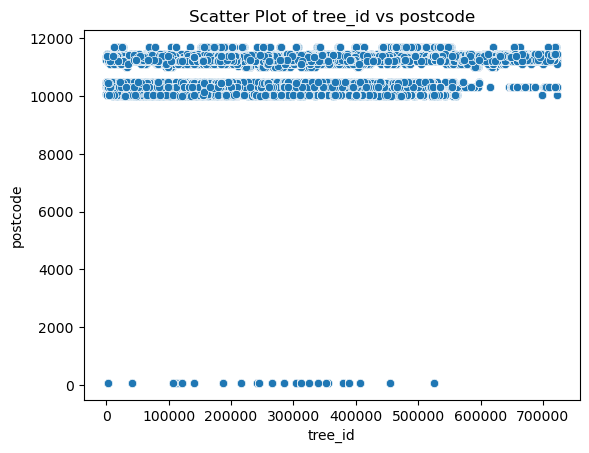

In [45]:
sns.scatterplot(data=data, x='tree_id', y='postcode')
plt.title('Scatter Plot of tree_id vs postcode')
plt.xlabel('tree_id')
plt.ylabel('postcode')
plt.show()

Box plot for Numerical-Categorical Analysis

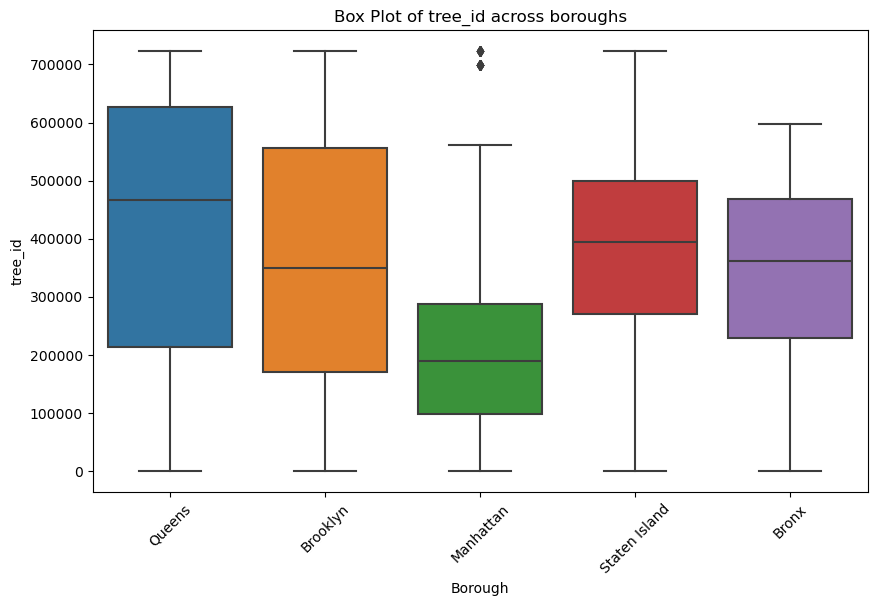

In [46]:
# Box plot for Numerical-Categorical Analysis (e.g., tree_id vs borough)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='borough', y='tree_id')
plt.title('Box Plot of tree_id across boroughs')
plt.xlabel('Borough')
plt.ylabel('tree_id')
plt.xticks(rotation=45)
plt.show()

Count plot for Categorical-Categorical Analysis

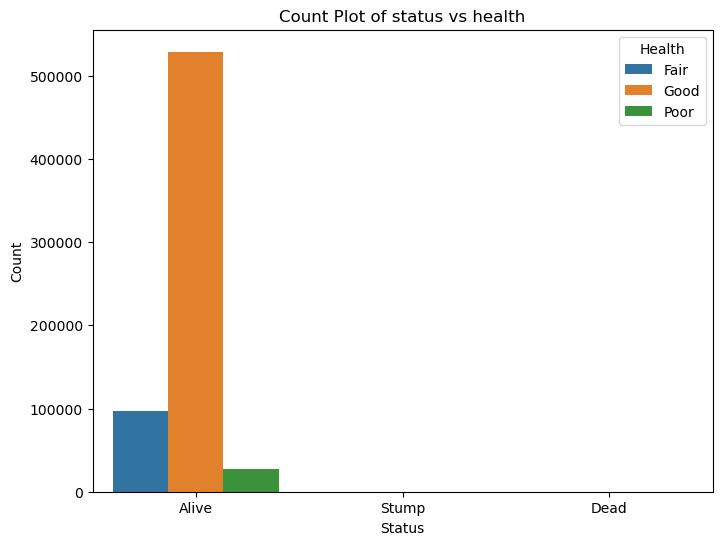

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status', hue='health')
plt.title('Count Plot of status vs health')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Health')
plt.show()

WEB SCRAPING

In [48]:
url = 'https://tree-map.nycgovparks.org/tree-map/'

response = requests.get(url)
response.raise_for_status() 

In [49]:
soup = BeautifulSoup(response.text, 'html.parser')

In [50]:
soup.find('div')

<div data-reactroot="" id="__next"><div class="PageContainer_condensed__sFakd"><header class="GlobalHeader_globalHeader__3EDfN GlobalHeader_tree-map-condensed__bY4LV"><div class="NYCGovHeader_nycGovBase__iK22C"><div class="NYCGovHeader_upperHeaderBlack__N1xpF"><div class="NYCGovHeader_container__QKW2D"><span class="NYCGovHeader_upperHeaderLeft__ULw_g"><a href="http://www1.nyc.gov"><span style="box-sizing:border-box;display:inline-block;overflow:hidden;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;position:relative;max-width:100%"><span style="box-sizing:border-box;display:block;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;max-width:100%"><img alt="" aria-hidden="true" src="data:image/svg+xml,%3csvg%20xmlns=%27http://www.w3.org/2000/svg%27%20version=%271.1%27%20width=%2740%27%20height=%2715%27/%3e" style="display:block;max-width:100%;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding

In [51]:
promo_sections = soup.find_all('div', class_='Callout_callout__qI9v9')
for section in promo_sections:
    promo_title = section.find('h2').text.strip() if section.find('h2') else 'No Title'
    promo_description = section.find('div', class_='Callout_body__gg0lt').text.strip() if section.find('div', class_='Callout_body__gg0lt') else 'No Description'
    print(f"Promotion Title: {promo_title}\nDescription: {promo_description}")

Promotion Title: NYCʼs Great Tree Search
Description: Weʼre looking for NYCʼs greatest trees, and we need your help. You can nominate a tree in your neighborhood through the NYC Tree Map, and help us tell its story. Find your tree on the map to get started.


In [52]:
tree_stats = soup.find_all('div', class_='StatisticDisplayItem_statisticContainer__s_8hd')
for stat in tree_stats:
    number = stat.find('div', class_='StatisticDisplayItem_statisticNumber__ys_cn').text
    title = stat.find('span', class_='StatisticDisplayItem_statisticTitle__k6PSV').text
    print(f"{title}: {number}")

 Trees on Map: 868,799
 Activities Reported: 57,461
 Trees Favorited: 14,581
 Tree Species on Map: 542
 Most Common Species83,788 trees, 10% of trees on the map: London planetree 


In [53]:
education_links = soup.find_all('a', href=True, class_='SectionMoreLink_moreLink__SWpWe')
for link in education_links:
    print(f"Learn More: {link['href']}")

Learn More: /tree-map/learn/about
Learn More: /tree-map/learn
Learn More: https://nycgovparks.org/reg/stewardship
Learn More: /tree-map/learn/benefits


In [54]:
base_url = 'https://tree-map.nycgovparks.org'

In [55]:
for link in education_links:
    full_url = base_url + link['href'] if link['href'].startswith('/') else link['href']
    print(f"Learn More: {full_url}")

Learn More: https://tree-map.nycgovparks.org/tree-map/learn/about
Learn More: https://tree-map.nycgovparks.org/tree-map/learn
Learn More: https://nycgovparks.org/reg/stewardship
Learn More: https://tree-map.nycgovparks.org/tree-map/learn/benefits


In [56]:
social_media_links = soup.find_all('a', {'data-testid': ['shareOnFacebook', 'shareOnTwitter']})
for link in social_media_links:
    platform = 'Facebook' if 'facebook' in link['href'] else 'Twitter'
    print(f"Share on {platform}: {link['href']}")

Share on Facebook: https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Ftree-map.nycgovparks.org%2F
Share on Twitter: https://twitter.com/share?text=The+New+York+City+Tree+Map+brings+New+York+City%27s+urban+forest+to+your+fingertips%2E&url=https%3A%2F%2Ftree-map.nycgovparks.org%2F&via=nycparks


In [57]:
community_data = soup.select('.ActivitiesList_activityItem__dH2OC')
for df in community_data:
    event_date = df.find('span', class_='ActivitiesList_activityDate__vYydH').text.strip() if df.find('span', class_='ActivitiesList_activityDate__vYydH') else 'No Date'
    event_summary = df.find('span', class_='ActivitiesList_activitySummary__tZcwl').text.strip() if df.find('span', class_='ActivitiesList_activitySummary__tZcwl') else 'No Summary'
    print(f"Df: {event_date}, Summary: {event_summary}")
   

Df: May 3, 2024, Summary: The Tuliptree near 50 Dobbin Street was weeded and was cleared of litter/waste.
Df: May 3, 2024, Summary: The Kentucky coffeetree near 1268 Prospect Avenue was weeded, had soil managed, and was cleared of litter/waste.
Df: May 3, 2024, Summary: The London planetree near 1335 Prospect Avenue was weeded, had soil managed, and was cleared of litter/waste.


In [58]:
df

<div class="ActivitiesList_activityItem__dH2OC"><span class="ActivitiesList_activityDate__vYydH">May 3, 2024</span> <span class="ActivitiesList_activitySummary__tZcwl">The <a class="A_link__b8As5" href="/tree-map/tree/1408411">London planetree near 1335 Prospect Avenue</a> <!-- -->was weeded, had soil managed, and was cleared of litter/waste<!-- -->.</span></div>

Research Question - 1:

1)What is the correlation between tree health and surrounding urban infrastructure, such as sidewalk damage and the presence of tree guards?

Understanding this relationship can help city planners design more tree-friendly urban spaces, potentially improving tree health and longivity. This could result in better city planning and public works prioritization.

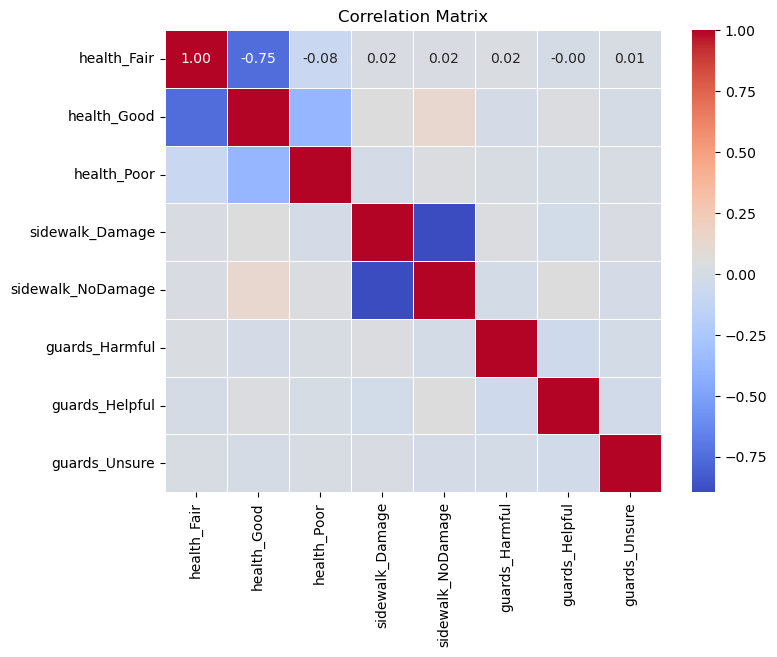

In [59]:
selected_columns = ['health', 'sidewalk', 'guards']

# Convert categorical variables to one-hot encoded format
data_encoded = pd.get_dummies(data[selected_columns])

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

2)How does tree species diversity correlate with stewardship signs and overall tree health?

Insights from this question may be used by urban forestry programs to determine if certain species benefit more from community engagement than others, influencing tree planting decisions.

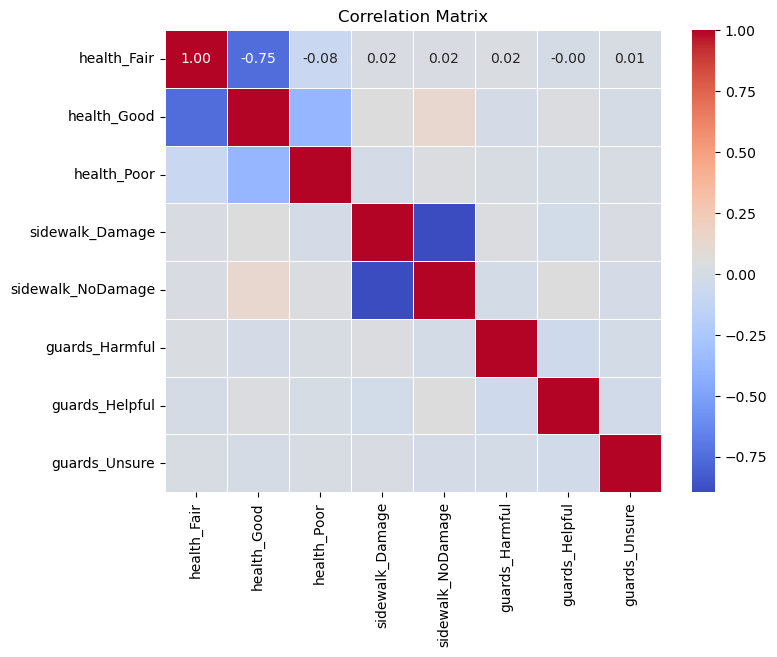

In [60]:

# Convert categorical variables to one-hot encoded format
data_encoded = pd.get_dummies(data[selected_columns])

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [67]:
# Replace missing values for 'steward' column with the most frequent value

# Replace NaN values in 'spc_latin' with empty strings
data['spc_latin'] = data['spc_latin'].fillna('')

# Extract tree species features
data['genus'] = data['spc_latin'].apply(lambda x: x.split()[0] if x else '')
data['species'] = data['spc_latin'].apply(lambda x: x.split()[-1] if x else '')

# One-hot encoding for categorical variables
cat_cols = ['curb_loc', 'status', 'sidewalk', 'borough']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

data_encoded['steward'].fillna(data_encoded['steward'].mode()[0], inplace=True)

# Replace missing values for 'guards' column with the most frequent value
data_encoded['guards'].fillna(data_encoded['guards'].mode()[0], inplace=True)

# Display the updated DataFrame

data_encoded.head()

,tree_id,health,spc_latin,spc_common,steward,guards,address,postcode,genus,species,curb_loc_OnCurb,status_Dead,status_Stump,sidewalk_NoDamage,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,180683,Fair,Acer rubrum,red maple,1or2,Helpful,108-005 70 AVENUE,11375,Acer,rubrum,True,False,False,True,False,False,True,False
1,200540,Fair,Quercus palustris,pin oak,1or2,Helpful,147-074 7 AVENUE,11357,Quercus,palustris,True,False,False,False,False,False,True,False
2,204026,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,390 MORGAN AVENUE,11211,Gleditsia,inermis,True,False,False,False,True,False,False,False
3,204337,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,1027 GRAND STREET,11211,Gleditsia,inermis,True,False,False,False,True,False,False,False
4,189565,Good,Tilia americana,American linden,1or2,Helpful,603 6 STREET,11215,Tilia,americana,True,False,False,False,True,False,False,False


In [69]:
data

,tree_id,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,address,postcode,borough,genus,species
0,180683,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,108-005 70 AVENUE,11375,Queens,Acer,rubrum
1,200540,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,147-074 7 AVENUE,11357,Queens,Quercus,palustris
2,204026,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,390 MORGAN AVENUE,11211,Brooklyn,Gleditsia,inermis
3,204337,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,1027 GRAND STREET,11211,Brooklyn,Gleditsia,inermis
4,189565,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,603 6 STREET,11215,Brooklyn,Tilia,americana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,32 MARCY AVENUE,11211,Brooklyn,Quercus,palustris
683784,183795,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,67-035 SELFRIDGE STREET,11375,Queens,Cladrastis,kentukea
683785,166161,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,130 BIDWELL AVENUE,10314,Staten Island,Acer,rubrum
683786,184028,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,1985 ANTHONY AVENUE,10457,Bronx,Acer,rubrum
